# Revisiting the Primer Vector

In this notebook we revisit the primer vector theory from Lawden from the lens of first order variations.

## Theory and notation

------------

a) Consider the following definition of the State Transition Matrix, $\mathbf M_{fs}$:

$$
\mathbf M_{fs} := \frac{\partial \mathbf x_{f}}{\partial \mathbf x_{s}}
$$

Note how this definition does not depend on the dynamics. The STM allows to describe variations of the (final) state at $f$ as:

$$
\delta\mathbf x_f = \mathbf M_{fs} \delta \mathbf x_s
$$

We also make use of the following definitions for the various blocks of the STM:

$$
\mathbf M = \left[ 
\begin{array}{c|c} 
  \mathbf M^{rr} & \mathbf M^{rv} \\ 
  \hline 
  \mathbf M^{vr} & \mathbf M^{vv} 
\end{array} 
\right] 
= \left[ 
\begin{array}{c|c} 
  \mathbf M^{xr} & \mathbf M^{xv} 
\end{array} 
\right] 
= \left[ 
\begin{array}{c} 
  \mathbf M^{rx} \\
  \hline 
  \mathbf M^{vx} 
\end{array} 
\right] 
$$

---------------

b) Assume now to have a grid of $N$ points along a multiple impulse trajectory and pick three indexes $i,j,k$. 

We ask the following question: what happens when we add three small $\delta\Delta V$ at the selected nodes?

To answer this question, we compute the variation of the final state due to intermidiate variations at the nodes using the STMs:

$$
\delta \mathbf x_f = \mathbf M_{fi}\delta\mathbf x_i + \mathbf M_{fj}\delta\mathbf x_j + \mathbf M_{fk}\delta\mathbf x_k
$$

which we set to zero, as we do not want the trajectory boundary cnstraints to change, only find a better $\Delta V$:

$$
\mathbf 0 = \mathbf M_{fi}\delta\mathbf x_i + \mathbf M_{fj}\delta\mathbf x_j + \mathbf M_{fk}\delta\mathbf x_k
$$

which becomes (multiplying by $\mathbf M_{jf}$):

$$
\mathbf M_{ji}\delta\mathbf x_i + \mathbf M_{jk}\delta\mathbf x_k + \delta\mathbf x_j = \mathbf 0
$$

--------------

c) The state variations $\delta\mathbf x$ are, in our case, consequence of three $\delta\Delta \mathbf V$, so that the previous equations becomes:

$$
\begin{align}
\mathbf M_i^{rv} \delta\Delta \mathbf V_i + \mathbf M_k^{rv} \delta\Delta \mathbf V_k = \mathbf 0\\
\mathbf M_i^{vv} \delta\Delta \mathbf V_i + \mathbf M_k^{vv} \delta\Delta \mathbf V_k + \delta\Delta \mathbf V_j = \mathbf 0\\
\end{align}
$$

which becomes:

$$
\begin{align}
\delta\Delta \mathbf V_i &=& - (\mathbf M_i^{rv})^{-1}\mathbf M_k^{rv} \delta\Delta \mathbf V_k = \mathbf A_{ik}\delta\Delta \mathbf V_k\\
\delta\Delta \mathbf V_j &=& - \big(\mathbf M_i^{vv}\mathbf A_{ik} + \mathbf M_k^{vv} \big)  \delta\Delta \mathbf V_k = \mathbf A_{jk}\delta\Delta \mathbf V_k\\
\end{align}
$$

The matrices $\mathbf A$ are telling us how the three variations of impulsive velocity changes applied in ($i$, $j$, $k$) must be related for the overall trajectory to not change its boundary conditions (i.e. $\mathbf x_f = \mathbf 0$).

-------------

d) So far the three indexes we picked (i.e. $i,j,k$) were completely equivalent, now we assume that in $i,j$ a finite $\Delta V$ is already present, while in $k$ only our additional $\delta\Delta \mathbf V$ will be present.

The total magnitude of the $\Delta \mathbf V$ can then be expressed by:

$$
J = \Delta V_{tot} = |\mathbf V_i + \delta\Delta \mathbf V_i | + |\mathbf V_j + \delta\Delta \mathbf V_j | + |\delta\Delta \mathbf V_k|
$$

and its first order variation:

$$
\delta J = \frac{\Delta\mathbf V_i}{|\Delta \mathbf V_i|}\cdot \delta\Delta \mathbf V_i + \frac{\Delta \mathbf V_j}{|\Delta \mathbf V_j|}\cdot \delta\Delta \mathbf V_j + |\delta\Delta \mathbf V_k|
$$

e) The primer vector

We introduce $\hat{\mathbf u} = \frac{\delta \Delta \mathbf V_k}{|\delta \Delta \mathbf V_k|}$ as the unit vector along the direction of the $\delta \Delta V$ added in $k$. Substituting and regrouping we have:

$$
\delta J = |\delta\Delta \mathbf V_k| \left(1 + \left(\mathbf A_{ik}^T\frac{\Delta\mathbf V_i}{|\Delta \mathbf V_i|} + \mathbf A_{jk}^T\frac{\Delta\mathbf V_j}{|\Delta \mathbf V_j|} \right) \cdot \hat {\mathbf u}\right)
$$

which we rewrite as:

$$
\delta J = |\delta\Delta \mathbf V_k| \left(1 - \mathbf p\cdot \hat {\mathbf u}\right)
$$

where we have introduced the vector:

$$
\boxed{\mathbf p = - \mathbf A_{ik}^T\frac{\Delta\mathbf V_i}{|\Delta \mathbf V_i|} - \mathbf A_{jk}^T\frac{\Delta\mathbf V_j}{|\Delta \mathbf V_j|}}
$$

which is of fundamental importance in space flight mechanics and is called **primer vector**. 

:::{note}
From the expression of $\delta J$ it appears clear that if we want to be able to decrease the overall $\Delta V$ adding in $k$ one impulse it is necessary for the norm of the primer vector (computed in $k$) to be larger than 1.

Classically the result of the primer vector is derived starting from Pontryagin maximum principle, here we have presented an original derivation building on the work from Bauregard et al. {cite:p}`beauregard`, which allows to extend the primer vector to new, previously untreated, cases (see the notebook [A primer vector surrogate](<./primer_vector_surrogate.ipynb>)).

Enough of that, let us start coding now ...

In [1]:
import pykep as pk
import numpy as np
np.set_printoptions(legacy='1.25')
import matplotlib.pyplot as plt

Let us define a toy problem. In the Keplerian dynamics, we have the following (optimal) four-impulse trajectory which was obtained using the [pl2pl_N_impulses UDP](<./udp_pl2pl_N_impulses.ipynb>).

In [2]:
# Problem data
start = pk.planet(pk.udpla.jpl_lp("earth"))
target = pk.planet(pk.udpla.jpl_lp("venus"))

r0 = np.array([-77310392520.5891, -130158155639.95819, 147108.35686371813])
v0 = np.array([25126.38412487125, -15324.0242317188, 0.017319637130567115])
DV0 = np.array([131.74444122221112, -111.57168023031436, -96.28585532081512])
dt0 = (194.835548685441557+14.82906396200053)*pk.DAY2SEC

r1 = np.array([27011591791.503845, 148104382453.56558, 170324664.00757253])
v1 = np.array([-29342.408370789373, 5003.190386138956, 90.37256194347349])
DV1 = np.array([2564.347941748753, -50.33730074112419, 941.8690690439083])
dt1 = 102.51706391196915*pk.DAY2SEC

r2 = np.array([-120164601140.7896, -15645977554.833487, 4332410828.357129])
v2 = np.array([9183.937186025161, -32921.84916571874, -601.1091614146442])
DV2 = np.array([-45.308371681150675, 200.42244183402727, -105.55464659459722])
dt2 =  47.818323440588806*pk.DAY2SEC

r3 = np.array([-13587329395.522686, -107835070067.45769, -689845413.6226778])
v3 = np.array([34510.778377374605, -4515.1531552484175, -2053.713672761537])
DV3 = np.array([-2709.616020196663, -5.353417557126704, -607.7075255532395])

We now define the grid where the prime vector will be computed, this will include 3 different segments, starting at the first impulse and ending at the third impulse.

In [3]:
# The grid for the first segment
tgrid0 = np.linspace(0, dt0, 104)
# The grid for the second segment
tgrid1 = np.linspace(dt0, dt0+dt1, 51)
# The grid for the third segment
tgrid2 = np.linspace(dt0+dt1, dt0+dt1+dt2, 23)
# The overall grid concatented
tgrid = np.concatenate((tgrid0, tgrid1[1:], tgrid2[1:]))

Note that the three grids are uniform, but with three `dts` all roughly (not exactly) 2 days. 
We compute the trajectory STMs at all grid points

We first compute the trajectory as well as the STMs. We need to propagate at each impulse, add the impulse, then proceed.

The various STMs thus computed will be:

$M_{00}, M_{10}, M_{20}, ... M_{n0} \quad | \quad M_{nn}, M_{(n+1)n}, M_{(n+2)n}, M_{mn} \quad | \quad M_{mm}, M_{(m+1)m}, ...  M_{fm}$

Instead we want:

$M_{00}, M_{10}, M_{20}, ... M_{f0}$

thus some extra manipulations will be necessary.

In [4]:
def propagate_mit(r0,v0):
    # First segment
    retval0 = pk.propagate_lagrangian_grid([r0, v0 + DV0], tgrid0, mu=pk.MU_SUN, stm=True)

    # Second segment
    retval1 = pk.propagate_lagrangian_grid(
        [retval0[-1][0][0], retval0[-1][0][1] + DV1], tgrid1, mu=pk.MU_SUN, stm=True
    )

    # Third segment
    retval2 = pk.propagate_lagrangian_grid(
        [retval1[-1][0][0], retval1[-1][0][1] + DV2], tgrid2, mu=pk.MU_SUN, stm=True
    )

    # We assemble all the trajectory in the same grid
    stms = [item[1] for item in retval0]
    posvels = [item[0] for item in retval0]
    Mn0 = retval0[-1][1]
    Mmn = retval1[-1][1]
    retval1.pop(0)
    retval2.pop(0)
    for item in retval1:
        stms.append(item[1] @ Mn0)
        posvels.append(item[0])
    for item in retval2:
        stms.append(item[1] @ Mmn @ Mn0)
        posvels.append(item[0])
    posvels[-1][1] = [a+b for a,b in zip(posvels[-1][1], DV3)]
    return posvels, stms

posvels, stms = propagate_mit(r0, v0)

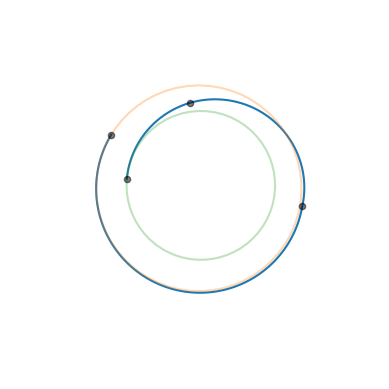

In [5]:
ax = pk.plot.make_3Daxis()
ax.plot([item[0][0] for item in posvels], [item[0][1] for item in posvels], [item[0][2] for item in posvels])
ax.scatter3D(posvels[0][0][0], posvels[0][0][1], posvels[0][0][2], 'ko', c='k', alpha=0.5)
ax.scatter3D(posvels[103][0][0], posvels[103][0][1], posvels[103][0][2], 'ko', c='k', alpha=0.5)
ax.scatter3D(posvels[153][0][0], posvels[153][0][1], posvels[153][0][2], 'ko', c='k', alpha=0.5)
ax.scatter3D(posvels[175][0][0], posvels[175][0][1], posvels[175][0][2], 'ko', c='k', alpha=0.5)

pk.plot.add_planet_orbit(ax, start, units=1., alpha=0.3)
pk.plot.add_planet_orbit(ax, target, units=1., alpha=0.3)
ax.axis('off')
ax.view_init(90,0)

In [50]:
def primer_vector(DVi, DVj, Mji, Mjk):
    #M -> (6,6)
    #DV -> (3,)
    # We apply the definition (see analytical formulas)
    Aik = -(np.linalg.inv(Mji[:3,3:]))@Mjk[:3,3:]
    Ajk = -(Mji[3:,3:]@Aik + Mjk[3:,3:])
    p = - Aik.T@DVi/np.linalg.norm(DVi) - Ajk.T@DVj/np.linalg.norm(DVj)
    return p, Aik, Ajk

In [59]:
res = []
# The gridpoints where the impulses are applied have idxs: 0 (DV0), 103 (DV1), 153 (DV2), 175 (DV3)
idx_i = 0
idx_j = 153
DVi = DV0
DVj = DV2
for idx_k, _ in enumerate(tgrid):
    Mji = stms[idx_j]@np.linalg.inv(stms[idx_i])
    Mjk = stms[idx_j]@np.linalg.inv(stms[idx_k])
    res.append(np.linalg.norm(primer_vector(DVi, DVj, Mji, Mjk)[0]))

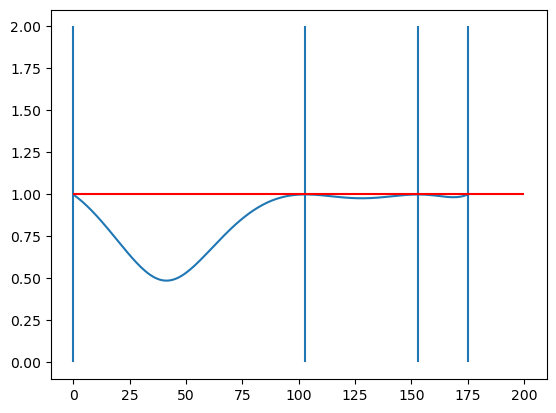

In [60]:
plt.plot(res)
plt.vlines(0, 0,2)
plt.vlines(103, 0,2)
plt.vlines(153, 0,2)
plt.vlines(175, 0,2)
plt.hlines(1, 0,200, 'r')


In [43]:
Mk0 = stms[25]
Mi0 = stms[103]
Mj0 = stms[175]

In [48]:
p, Aik, Ajk = primer_vector(
    DVi, DVj, Mj0 @ np.linalg.inv(Mi0), Mj0 @ np.linalg.inv(Mk0)
)
dDVk = p / np.linalg.norm(p)
dDVi = Aik @ dDVk
dDVj = Ajk @ dDVk

addedDV = np.linalg.norm(DV0) + np.linalg.norm(DV2)
print(
    "Total DV now is: ",
    np.linalg.norm(DV1 + dDVi)
    + np.linalg.norm(DV3 + dDVj)
    + np.linalg.norm(dDVk)
    + addedDV,
)
print("Total DV was: ", np.linalg.norm(DV1) + np.linalg.norm(DV3) + addedDV)

Total DV now is:  5939.010744217118
Total DV was:  5937.927384608611


In [11]:
rf, vf = propagate_mit(r0, v0)[0][-1]
rf = np.array(rf)
vf = np.array(vf)

In [12]:
# First segment 0-i
retval0 = pk.propagate_lagrangian_grid([r0, v0 + DV0], tgrid[:103+1], mu=pk.MU_SUN, stm=False)

# Second segment i-k
retval1 = pk.propagate_lagrangian_grid(
    [retval0[-1][0], retval0[-1][1] + DV1 + dDVi], tgrid[103:125+1], mu=pk.MU_SUN, stm=False
)

# Third segment k-2
retval2 = pk.propagate_lagrangian_grid(
    [retval1[-1][0], retval1[-1][1] + dDVk], tgrid[125:153+1], mu=pk.MU_SUN, stm=False
    )

# Third segment k-2
retval3 = pk.propagate_lagrangian_grid(
    [retval2[-1][0], retval2[-1][1] + DV2], tgrid[153:176], mu=pk.MU_SUN, stm=False
    )

rf_new = np.array(retval3[-1][0])
vf_new = np.array(retval3[-1][1] + DV3 + dDVj)

print("Change in rf (rel.)", np.linalg.norm(rf_new-rf)/ np.linalg.norm(rf))
print("Change in vf (rel.)", np.linalg.norm(vf_new-vf)/ np.linalg.norm(vf))


Change in rf (rel.) 5.58230122451689e-09
Change in vf (rel.) 5.322543656762306e-09


In [13]:
import pygmo as pg
import pygmo_plugins_nonfree as ppnf

class my_udp:
    def __init__(self, max_DV=10):
        self.max_DV = max_DV

    # x = [eta, ui, vi, dDVi, uk, vk, dDVk, uj, vj, dDVj]
    def get_bounds(self):
        lb = [0.1, 0,0,0,0,0,0,0,0,0]
        ub = [0.8, 1,1, self.max_DV, 1, 1, self.max_DV, 1, 1, self.max_DV]
        return (lb, ub)
    
    def get_nec(self):
        return 6
    
    
    def decode(self, x):
        dDVi = pk.utils.uvV2cartesian(x[1:4])
        dDVk = pk.utils.uvV2cartesian(x[4:7])
        dDVj = pk.utils.uvV2cartesian(x[7:10])
        return np.array(dDVi), np.array(dDVk), np.array(dDVj)

    def fitness(self, x):
        dDVi, dDVk, dDVj = self.decode(x)
        r, v = pk.propagate_lagrangian([r0, v0 + DV0], dt0, mu=pk.MU_SUN, stm=False)
        r, v = pk.propagate_lagrangian(
            [r, v + DV1 + dDVi], dt1 * x[0], mu=pk.MU_SUN, stm=False
        )
        r, v = pk.propagate_lagrangian(
            [r, v + dDVk], dt1 * (1-x[0]), mu=pk.MU_SUN, stm=False
        )
        r, v = pk.propagate_lagrangian(
            [r, v + DV2], dt2, mu=pk.MU_SUN, stm=False
        )
        rf = r
        vf = v
        totalDV = np.linalg.norm(DV0) + np.linalg.norm(DV1+dDVi) + np.linalg.norm(dDVk) + np.linalg.norm(DV2) + np.linalg.norm(DV3+dDVj) 
        ceq = [
            (rf[0] - r3[0]) / np.linalg.norm(r3),
            (rf[1] - r3[1]) / np.linalg.norm(r3),
            (rf[2] - r3[2]) / np.linalg.norm(r3),
            (vf[0] + dDVj[0] - v3[0]) / np.linalg.norm(v3),
            (vf[1] + dDVj[1] - v3[1]) / np.linalg.norm(v3),
            (vf[2] + dDVj[2] - v3[2]) / np.linalg.norm(v3)
        ]
        return [totalDV] + ceq

udp = my_udp(4000)
prob = pg.problem(udp)
prob.c_tol = 1e-10

In [14]:
udp.fitness([0.3,0,0,0,0,0,0,0,0,0])

[5937.927384608611,
 8.739171201888898e-15,
 7.019414619991082e-16,
 -3.180672249683459e-16,
 0.07771641025056704,
 0.00015354514884407663,
 0.01743008862370961]

In [118]:
def solve(udp, N=20, screen=False):
    snopt72 = "/Users/dario.izzo/opt/libsnopt7_c.dylib"
    uda = ppnf.snopt7(library=snopt72, minor_version=2, screen_output=screen)
    uda.set_integer_option("Major iterations limit", 2000)
    uda.set_integer_option("Iterations limit", 20000)
    uda.set_numeric_option("Major optimality tolerance", 1e-3)
    uda.set_numeric_option("Major feasibility tolerance", 1e-11)

    #uda = pg.nlopt("slsqp")
    algo = pg.algorithm(uda)
    print("Multi-start:")

    res = list()
    for i in range(N):
        pop = pg.population(udp, 20)
        pop = algo.evolve(pop)
        if prob.feasibility_f(pop.champion_f):
            res.append([pop.champion_f, pop.champion_x])
            print(i, pop.champion_f[0], end= '\r')
    if len(res) > 0:
        best_x = sorted(res, key =  lambda x: x[0][0])[0][1]
        print(f"\nThe best solution found has a DV of {udp.fitness(best_x)[0]/1000:.8e} km/s")
        return best_x
    else:
        print("\n No Solutions found")

best_x = solve(udp, 1000, False)

Multi-start:


KeyboardInterrupt: 

In [55]:
best_x

array([2.76165966e-01, 5.52283195e-01, 9.13177496e-01, 6.88820906e+02,
       2.36577375e-02, 6.29843124e-01, 3.52109159e+02, 7.12780973e-01,
       9.97574524e-01, 9.02184491e+02])

In [56]:
dDVi, dDVk, dDVj = udp.decode(best_x)

In [68]:
newDVs = [DV0, DV1+dDVi, dDVk, DV2, DV3+dDVj]
sum([np.linalg.norm(it) for it in newDVs])

5722.11468396259

In [69]:
oldDVs = [DV0, DV1, np.array([1e-14,1e-14,1e-14]), DV2, DV3]
sum([np.linalg.norm(it) for it in oldDVs])

5937.927384608611

In [70]:
eta = best_x[0]
Ts = np.array([dt0, dt1*eta, dt1*(1-eta), dt2])*pk.SEC2DAY

In [71]:
alphas, T = pk.utils.direct2alpha(Ts)

In [72]:
uvVs = [pk.utils.cartesian2uvV(it) for it in newDVs]
uvVs_old = [pk.utils.cartesian2uvV(it) for it in oldDVs]

In [73]:
retval = [140, T]
for i in range(3):
    retval+=[alphas[i], uvVs[i][0], uvVs[i][1], uvVs[i][2]]
retval+=[alphas[-1]]

In [77]:
np.linalg.norm(DV2)

231.00603271954103

In [87]:
newDVs = [DV0, DV1+dDVi, dDVk, DV2, DV3+dDVj]
[np.linalg.norm(it) for it in newDVs]

[197.6783803290919,
 2151.095744228057,
 443.99636847169444,
 231.01522921314478,
 2701.8396622287887]

In [16]:
import pykep as pk
import numpy as np
DVi = np.random.random((3,)) / 2 - 1
DVj = np.random.random((3,)) / 2 - 1
# Test the primer vector at k=i
Mji = np.random.random((6, 6)) / 2 - 1
Mjk = Mji
p, Aik, Ajk = pk.trajopt.primer_vector(DVi, DVj, Mji, Mjk)

In [64]:
DVi = np.random.random((3,)) / 2 - 1
DVj = np.random.random((3,)) / 2 - 1

# Test the primer vector at k=i
Mji = np.random.random((6, 6)) / 2 - 1
Mjk = np.random.random((6, 6)) / 2 - 1

In [71]:
Mji

array([[-0.80140392, -0.7342828 , -0.95658503, -0.9518078 , -0.90595501,
        -0.72961329],
       [-0.79608864, -0.58656762, -0.5316812 , -0.75912261, -0.56271715,
        -0.95310751],
       [-0.70607634, -0.85556242, -0.99202347, -0.91761746, -0.95060181,
        -0.87727527],
       [-0.67825648, -0.90617417, -0.90004977, -0.69673072, -0.80632424,
        -0.80114554],
       [-0.89286774, -0.61525978, -0.75937889, -0.66058482, -0.64036131,
        -0.80921232],
       [-0.72331341, -0.54443431, -0.72025996, -0.60894679, -0.89422384,
        -0.90989814]])

In [65]:
p, Aik, Ajk = pk.trajopt.primer_vector(DVi, DVj, Mji, Mjk)

In [66]:
p

array([ 0.79724462, -0.80339336,  0.30028151])

In [67]:
Aik

array([[-3.15582636, -0.46758939, -1.03914171],
       [ 1.83003987, -0.34466409,  0.72544895],
       [ 0.67701443, -0.27496556, -0.34179198]])

In [68]:
Ajk

array([[ 0.53413762, -0.19506491,  0.55575075],
       [ 0.57273845, -0.12232608,  0.45832525],
       [ 1.23116126, -0.00624593,  0.33676658]])

In [12]:
Mji = np.random.random((6, 6)) / 2 - 1
Mjk = np.eye(6)
p, Aik, Ajk = pk.trajopt.primer_vector(DVi, DVj, Mji, Mjk)

In [15]:
Ajk

array([[-1., -0., -0.],
       [-0., -1., -0.],
       [-0., -0., -1.]])